## Clase 4

Para aproximar funciones utilizamos la serie de Taylor

$$f(x)=\sum_{n=0}^{\infty}\frac{f^{n}(x_0)(x-x_{0})^{n}}{n!}=f(x_0)+f^{'}(x_0)(x-x_{0})+\frac{f^{''}(x_0)(x-x_0)^{2}}{2!}+\frac{f^{'''}(x_0)(x-x_0)^{3}}{3!}+...$$

In [1]:
#Explicar diferencias entre usar una aproximación lineal y una cuadrática
#¿Qué ocurre cuando no consideramos los términos cúbicos?
#¿Por qué no podemos aproximarnos al primer punto ni al último?
#¿Cómo eliminar los términos cuadráticos?
#Comparar precisiones

#Hoy calculamos derivadas simétricas, derivadas antisimétricas, derivadas con el método de Euler

Veamos como programar esto

Para hacer comparaciones numéricas es recomendable utilizar funciones periódicas con serie de Taylor infinita, como ejemplo tenemos las funciones trigonómetricas, las de Bessel, las de Airy, etc.

Vamos a encontrar la derivada de $$f(x)=sin^{2}(x)$$

In [2]:
from pylab import *

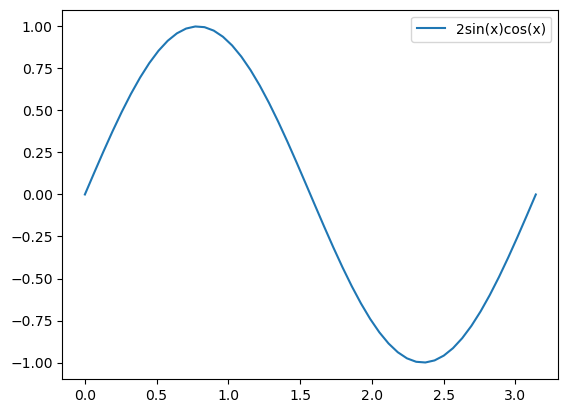

In [3]:
x=linspace(0,pi)
y=(sin(x))**2 +1
dy=2*sin(x)*cos(x)
plot(x,dy,label="2sin(x)cos(x)")
legend() #para que aparezca qué significa la línea 
show()#para que no aparezca la información: [<matplotlib.lines.Line2D at 0x7f6bf8909350>] sobre la gráfica

In [23]:
def Euler(x,y):
    h=x[1]-x[0]
    dy=zeros_like(y) #es más eficiente declarar dy de esta forma porque aparta la memoria necesaria
    for i in range (len(y)-1): #no podemos calcular el primer punto ni el último
        dy[i]=y[i+1]-y[i] #f_i+1 - f_i
    dy[-1]= -y[-1]+y[-2] #f_n - f_n-1
    dy=dy/h
    return dy

def Deriv_h3b(x,y): #esta función no considera los términos cúbicos (se murieron)
    h=x[1]-x[0]
    h2=2*h
    dy=zeros_like(y) #es más eficiente declarar dy de esta forma porque aparta la memoria necesaria
    for i in range (1,len(y)-1):
        dy[i]=y[i+1]-y[i] #f_i+1 - f_i-1
    dy[0]=(y[1]-y[0])/h #f_1 - f_0
    dy[-1]= (-y[-1]+y[-2])/h #f_n - f_n-1
    dy[1:-1]=dy[1:-1]/h #los símbolos entre corchetes es para quitarle el primer y el último valor al arreglo
    return dy



Podemos quitarle los extremos a un arreglo para que inicie en el valor que necesitamos, a continuación se muestra cómo hacerlo

In [5]:
a=linspace(0,1,11) #es un arreglo
b=[1,2,3,4] #es una lista
print(a)
print(a[1:-1]) #para quitarle un extremo al vector
print(type(a))
print(type(b))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
<class 'numpy.ndarray'>
<class 'list'>


Vamos a asignar los siguientes valores a las variables "dy_euler" y "dy_h3b"

In [6]:
dy_euler= Euler(x,y)
dy_h3b= Deriv_h3b(x,y)

A continuación tenemos las gráficas de las derivadas que calculamos con las funciones anteriores:

Primero tenemos la gráfica que compara la derivada "real" con la derivada obtenida por medio de Euler 

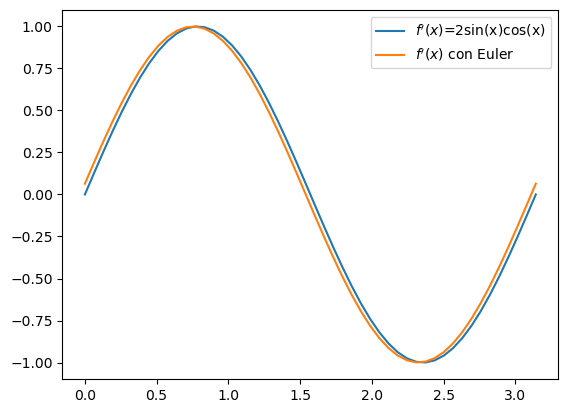

In [7]:
plot(x,dy,label="$f'(x)$=2sin(x)cos(x)")
plot(x,dy_euler,label="$f'(x)$ con Euler")
legend()
show()

La siguiente gráfica muestra la comparación entre la derivada "real", la derivada obtenida con Euler y la derivada obtenida cuando no consideramos los términos cúbicos (Deriv_h3)

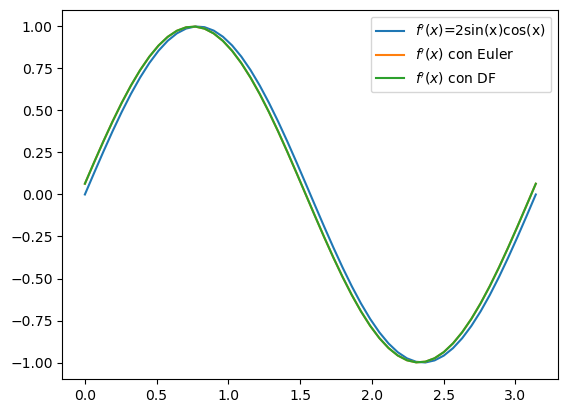

In [8]:
plot(x,dy,label="$f'(x)$=2sin(x)cos(x)")
plot(x,dy_euler,label="$f'(x)$ con Euler")
plot(x,dy_h3b,label="$f'(x)$ con DF")
legend()
show()

Para corregir el error ocasionado por los extremos vamos a considerar los términos al cubo

In [35]:
def Deriv_h3(x,y): #algoritmo de la derivada hacia adelante
    h2= 2*(x[1]-x[0])
    dy=zeros_like(y) #es más eficiente declarar dy de esta forma porque aparta la memoria necesaria
    for i in range (1,len(y)-1):
        dy[i]=y[i+1]-y[i-1] #f_i+1 - f_i-1
    dy[0]= -3*y[0] +4*y[1] -y[2] #f_1 - f_0 #esta línea lo hace diferente al algoritmo de Euler
    dy[-1]= 3*y[-1]-4*y[-2] +y[-3] #f_n - f_n-1
    dy=dy/h2 
    return dy

Agregamos la variable "dy_h3"

In [37]:
dy_euler= Euler(x,y)
dy_h3b= Deriv_h3b(x,y)
dy_h3=Deriv_h3(x,y)

#Recuerda siempre correr esta celda antes de la gráfica

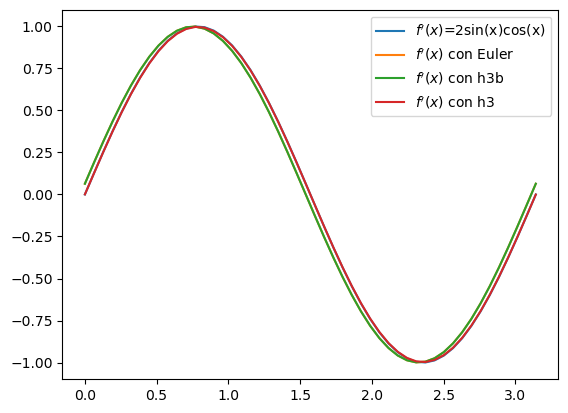

In [38]:
plot(x,dy,label="$f'(x)$=2sin(x)cos(x)")
plot(x,dy_euler,label="$f'(x)$ con Euler")
plot(x,dy_h3b,label="$f'(x)$ con h3b")
plot(x,dy_h3,label="$f'(x)$ con h3")
legend()
show()

Comparación entre ambos códigos

def Euler(x,y):
    h=x[1]-x[0]
    dy=zeros_like(y) #es más eficiente declarar dy de esta forma porque aparta la memoria necesaria
    for i in range (len(y)-1): #no podemos calcular el primer punto ni el último
        dy[i]=y[i+1]-y[i] #f_i+1 - f_i
    dy[-1]= -y[-1]+y[-2] #f_n - f_n-1
    dy=dy/h
    return dy

def Deriv_h3(x,y): #algoritmo de la derivada hacia adelante
    h2=2*(x[1]-x[0])
    dy=zeros_like(y) #es más eficiente declarar dy de esta forma porque aparta la memoria necesaria
    for i in range (1,len(y)-1):
        dy[i]=y[i+1]-y[i-1] #f_i+1 - f_i-1
    dy[0]=(-3*y[0] +4*y[1] -y[2]) #f_1 - f_0 #esta línea lo hace diferente al algoritmo de Euler
    dy[-1]= (-3*y[-1]-4*y[-2]+y[-3]) #f_n - f_n-1
    dy=dy/h2 
    return dy

Para calcular los erroes

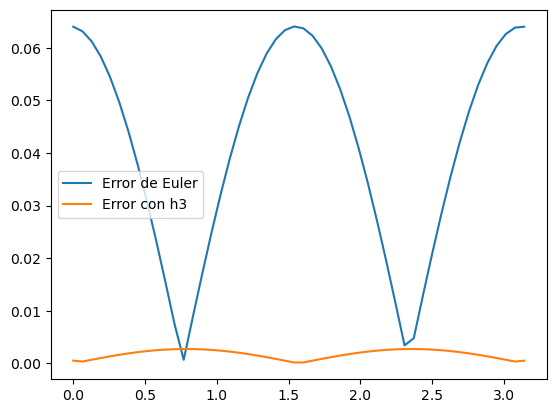

In [39]:
error_euler=abs(dy-dy_euler)
error_h3=abs(dy-dy_h3)
plot(x, error_euler, label="Error de Euler")
plot(x,error_h3,label="Error con h3")
legend()
show()

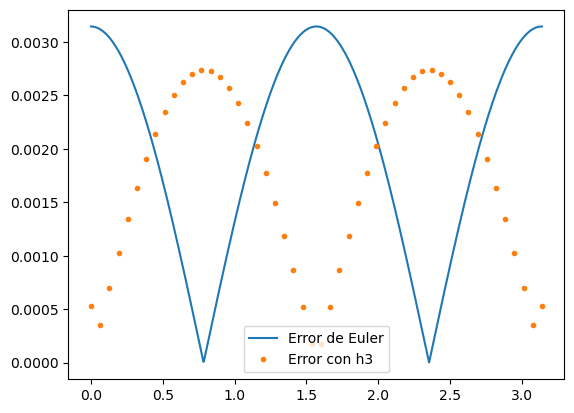

In [40]:
x_euler=linspace(0,pi,1000) #tuvimos que utilizar 100 puntos en lugar de sólo 50
y_euler=sin(x_euler)**2 +1
dy_euler_exacto= 2*cos(x_euler)*sin(x_euler)
dy_euler= Euler(x_euler,y_euler)

error_euler=abs(dy_euler_exacto -dy_euler)
error_h3=abs(dy-dy_h3)
plot(x_euler, error_euler, label="Error de Euler")
plot(x,error_h3,'.',label="Error con h3")
legend()
show()

In [ ]:
#Conforme usamos derivadsas de mayor orden hay que quitar más puntos, ganamos más precisión pero perdemos algo